In [1]:
from cgi import test
from lib2to3.pgen2.pgen import DFAState
from lib2to3.refactor import get_all_fix_names
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import scipy
import os
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')
import acquire

# Exercises
The end result of this exercise should be a file named prepare.py.

Using your store items data:

1) Convert date column to datetime format.

2) Plot the distribution of sale_amount and item_price.

3) Set the index to be the datetime variable.

4) Add a 'month' and 'day of week' column to your dataframe.

5) Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

6) Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.


In [2]:
df = acquire.HEB_data()

***

### 1) Convert date column to datetime format.

In [4]:
df.sale_date = df.sale_date.apply(lambda date: date[:-13])

In [5]:
df.sale_date = pd.to_datetime(df.sale_date, format='%a, %d %b %Y')

***

### 2) Plot the distribution of sale_amount and item_price.

<AxesSubplot:>

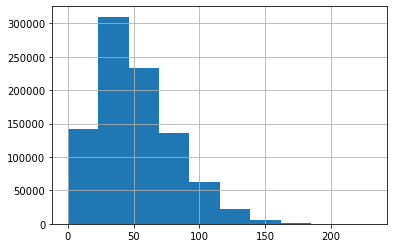

In [6]:
#sale_amount distribution plot
df.sale_amount.hist()

<AxesSubplot:>

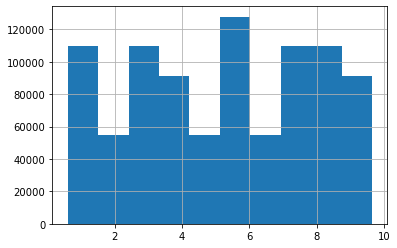

In [7]:
#item_price distribution plot
df.item_price.hist()

***

### 3) Set the index to be the datetime variable.

In [8]:
df = df.set_index('sale_date').sort_index()

In [9]:
df.head()

,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-01,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,74676640211,74676640211
2013-01-01,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664
2013-01-01,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,74676640211,74676640211
2013-01-01,12,35.0,215469,9,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,74676640211,74676640211


***

### 4) Add a 'month' and 'day of week' column to your dataframe.

In [10]:
df['month'] = df.index.strftime('%m-%b')

In [12]:
df['day_of_week'] = df.index.strftime('%w-%a')

In [13]:
df.head()

,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,day_of_week
sale_date,,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,01-Jan,2-Tue
2013-01-01,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,74676640211,74676640211,01-Jan,2-Tue
2013-01-01,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,01-Jan,2-Tue
2013-01-01,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,74676640211,74676640211,01-Jan,2-Tue
2013-01-01,12,35.0,215469,9,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,74676640211,74676640211,01-Jan,2-Tue


***

### 5) Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [14]:
df['sales_total'] = df.sale_amount * df.item_price

In [15]:
df.head(1)

,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,01-Jan,2-Tue,10.92


***

### 6) Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [16]:
def prep_store_data(df):
    df.sale_date = df.sale_date.apply(lambda date: date[:-13])
    df.sale_date = pd.to_datetime(df.sale_date, format='%a, %d %b %Y')
    # make sure we sort by date/time before resampling or doing other time series manipulations
    df = df.set_index('sale_date').sort_index()
    df['month'] = df.index.strftime('%m-%b')
    df['day_of_week'] = df.index.strftime('%w-%a')
    df['sales_total'] = df.sale_amount * df.item_price
    return df

***

Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

1) Convert date column to datetime format.

2) Plot the distribution of each of your variables.

3) Set the index to be the datetime variable.

4) Add a month and a year column to your dataframe.

5) Fill any missing values.

6) Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.


In [17]:
gdf = acquire.get_opsd_german_data()

- renaming columnto use call it easier 

In [23]:
gdf.columns = ['Date', 'Consumption', 'Wind', 'Solar', 'Wind_Solar']

***

### 1) Convert date column to datetime format.

In [26]:
gdf.Date = pd.to_datetime(gdf.Date)

***

### 2) Plot the distribution of each of your variables.

array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Consumption'}>],
       [<AxesSubplot:title={'center':'Wind'}>,
        <AxesSubplot:title={'center':'Solar'}>],
       [<AxesSubplot:title={'center':'Wind_Solar'}>, <AxesSubplot:>]],
      dtype=object)

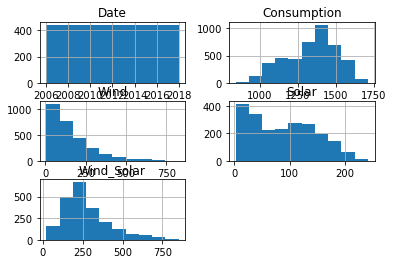

In [29]:
gdf.hist()

***

### 3) Set the index to be the datetime variable.

In [31]:
gdf = gdf.set_index('Date').sort_index()

***

### 4) Add a month and a year column to your dataframe.

In [32]:
gdf['month'] = gdf.index.strftime('%m-%b')
gdf['year'] = gdf.index.year

In [33]:
gdf.head(1)

,Consumption,Wind,Solar,Wind_Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,01-Jan,2006


***

### 5) Fill any missing values.

In [35]:
gdf = gdf.fillna(0)
gdf['wind_solar'] = gdf.Wind + gdf.Solar

In [37]:
gdf.head(1)

,Consumption,Wind,Solar,Wind_Solar,month,year,wind_solar
Date,,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,01-Jan,2006,0.0


***

### 6) Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [ ]:
# setting as df because we wont have two different data sets in the future runnning in the same notebook
def prep_opsd_data(df):
    #renaming models
    df.columns = ['date', 'consumption', 'wind', 'solar', 'wind_solar']
    df.date = pd.to_datetime(df.date)
    df = df.set_index('date').sort_index()
    df['month'] = df.index.strftime('%m-%b')
    df['year'] = df.index.year
    df = df.fillna(0)
    df['wind_solar'] = df.wind + df.solar
    return df